## Import packages

In [1]:
from vitrum.glass_Atoms import glass_Atoms
from vitrum.scattering import scattering

from ase.io import read
import matplotlib.pyplot as plt


## Load data

In [2]:
atoms = read("md.lammpstrj", index=":10" , format="lammps-dump-text")
atoms = [glass_Atoms(atom) for atom in atoms]

In [3]:
corr_atoms_dic = {1: 'Na', 2: 'O', 3:'Si'}
for atom in atoms:
    atom.set_new_chemical_symbols(corr_atoms_dic)

## S(Q)

In [4]:
qval, sq = scattering(atoms).get_structure_factor(rrange=15, qrange=30, nbin = 500)

Text(0, 0.5, 'S(Q)')

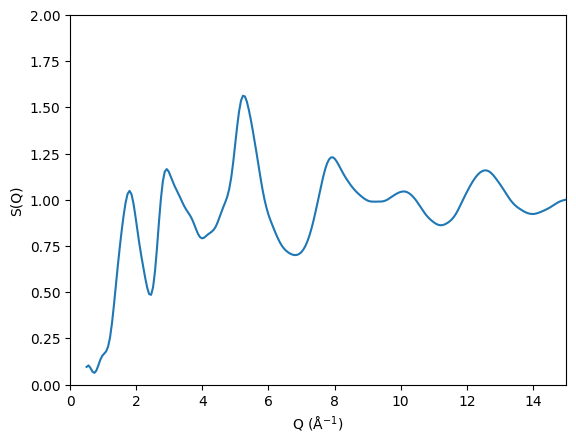

In [5]:
plt.plot(qval, sq)
plt.xlim(0,15)
plt.ylim(0,2)
plt.xlabel("Q (Å$^{-1}$)")
plt.ylabel("S(Q)")

## g(r)

In [6]:
rval, rdf = scattering(atoms).get_partial_pdf(['Na', 'O'], rrange=15, nbin = 500)

Text(0, 0.5, 'g(r)')

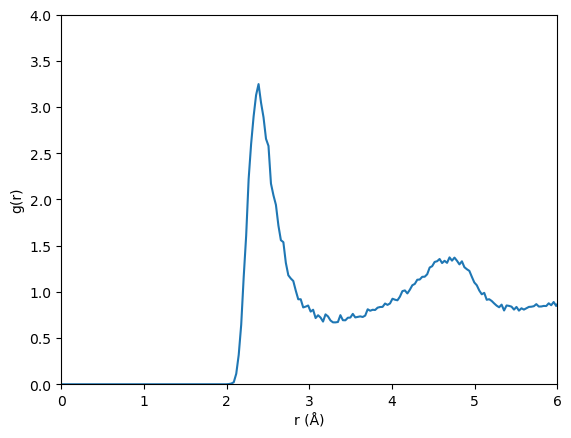

In [7]:
plt.plot(rval, rdf)
plt.xlim(0,6)
plt.ylim(0,4)
plt.xlabel("r (Å)")
plt.ylabel("g(r)")